In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [16]:
# Load dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Normalisasi data biar lebih optimal
X = StandardScaler().fit_transform(X)

# Inisialisasi t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Transformasi data ke 2D
X_tsne = tsne.fit_transform(X)

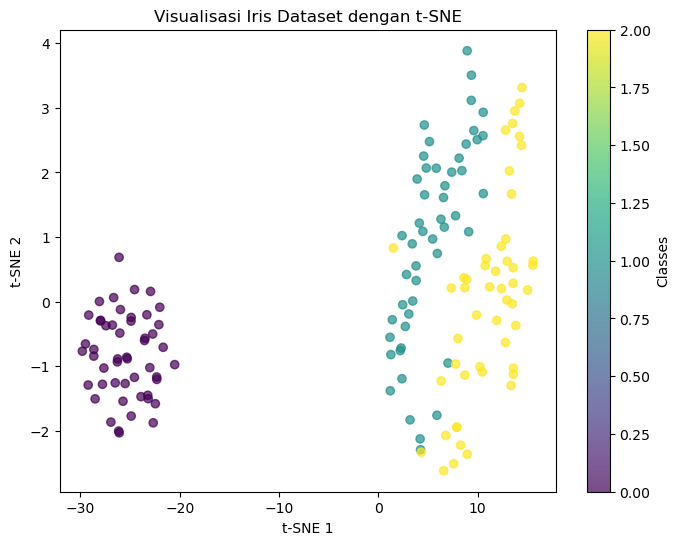

In [17]:
# Visualisasi hasil t-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Classes")
plt.title("Visualisasi Iris Dataset dengan t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

#Nice, Cen! 🎉 Visualisasinya berhasil! Dari hasil t-SNE ini, bisa kita lihat:
#Setosa (ungu) terpisah dengan jelas → Ini wajar karena Iris-setosa memang punya fitur yang cukup unik dibandingkan dua kelas lainnya.
#Versicolor (hijau) & Virginica (kuning) agak tumpang tindih → Dua kelas ini lebih mirip satu sama lain dibandingkan dengan Setosa, 
# jadi t-SNE masih menunjukkan beberapa overlap.

## Kita rubah t-SNE perplexitynya jadi 50

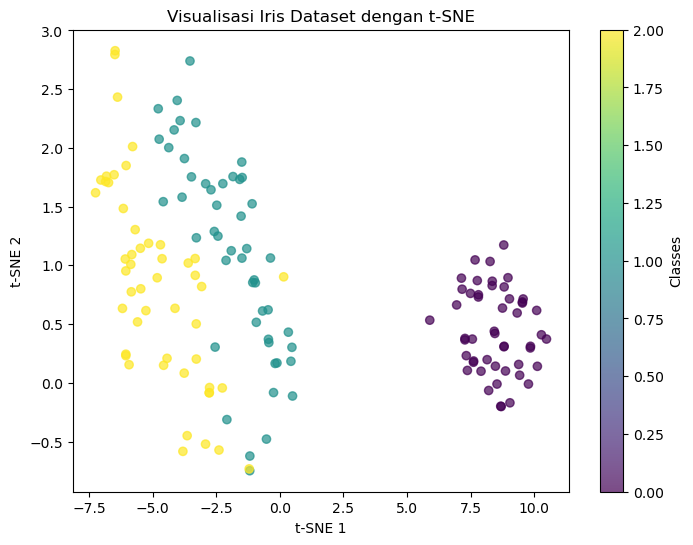

In [ ]:
# Load dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Normalisasi data biar lebih optimal
X = StandardScaler().fit_transform(X)

# Inisialisasi t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)

# Transformasi data ke 2D
X_tsne = tsne.fit_transform(X)

# Visualisasi hasil t-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Classes")
plt.title("Visualisasi Iris Dataset dengan t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

#Mantap, Cen! 🔥 Dengan perplexity = 50, hasilnya masih menunjukkan pola yang mirip, tapi ada beberapa perubahan:
#Setosa (ungu) tetap terpisah jelas → Ini konsisten karena memang fiturnya beda jauh dari dua kelas lainnya.
#Versicolor (hijau) & Virginica (kuning) jadi lebih tersebar → Dibandingkan sebelumnya, distribusinya lebih lebar, 
# menunjukkan bahwa dengan perplexity lebih tinggi, t-SNE mencoba menangkap struktur global lebih baik.

## Kita coba modeling dengan t-SNE sebagai preprocessing, lalu pakai model KNN untuk klasifikasi.

#### 📌 Langkah Modeling dengan t-SNE + KNN
#### Load dataset → Pakai dataset Iris.
#### Gunakan t-SNE untuk reduksi dimensi (dari 4 fitur ke 2D).
#### Pisahkan data train-test → Supaya bisa evaluasi performa model.
#### Latih model KNN pada hasil t-SNE → KNN akan belajar dari data 2D hasil t-SNE.
#### Evaluasi model dengan akurasi.



Akurasi KNN setelah t-SNE: 1.00


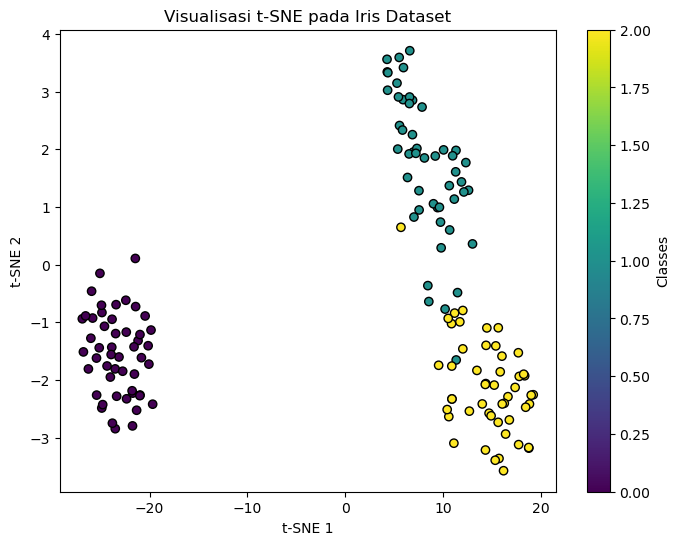

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Load dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# 2️⃣ Gunakan t-SNE untuk reduksi dimensi ke 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# n_components > 3 ❌ (Tidak disarankan!)
# t-SNE dibuat untuk reduksi dimensi dan eksplorasi visual.
# Kalau lebih dari 3, tidak bisa divisualisasikan langsung, dan biasanya tidak meningkatkan performa model.

X_tsne = tsne.fit_transform(X)

# 3️⃣ Pisahkan train-test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# 4️⃣ Latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5️⃣ Prediksi & evaluasi
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi KNN setelah t-SNE: {accuracy:.2f}")

# 🎨 Visualisasi hasil t-SNE
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', edgecolors='k')
plt.colorbar(label='Classes')
plt.title("Visualisasi t-SNE pada Iris Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
